In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.datasets import load_diabetes

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

**Задание 1:** Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [2]:
X, y = load_diabetes(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [4]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta * coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [5]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction) ** 2)) / len(y_real)

In [6]:
def bias(y, z):
    return (y - z)

In [7]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [8]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} с шагом {eta} на тренировочной выборке: '
    f'{mean_squared_error(y_train, train_prediction):.1f}, на тестовой выборке: {mean_squared_error(y_test, test_prediction):.1f}')

In [9]:
def get_error_plot(n_trees, max_depth, train_err, test_err):
    plt.xlabel('n_trees')
    plt.ylabel('MSE')
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.title(f'{n_trees} trees, max_depth {max_depth}')
    plt.show()

In [10]:
# Максимальная глубина деревьев
max_depth = 5

# Шаг
eta = 0.1

In [11]:
n_trees_range = [x for x in range(2, 5)] + [x * 5 for x in range(1, 5)] + [x * 10 for x in range(3, 6)]
n_trees_range

[2, 3, 4, 5, 10, 15, 20, 30, 40, 50]

Ошибка алгоритма из 2 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 20063.0, на тестовой выборке: 19072.6


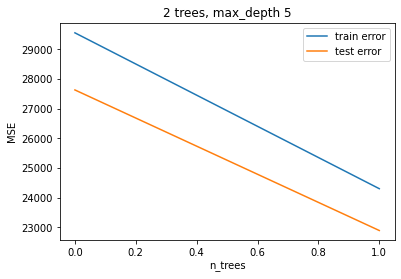

Ошибка алгоритма из 3 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 16604.1, на тестовой выборке: 16078.8


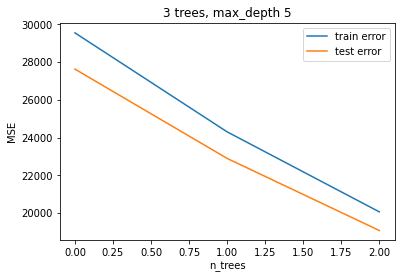

Ошибка алгоритма из 4 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 13773.9, на тестовой выборке: 13483.1


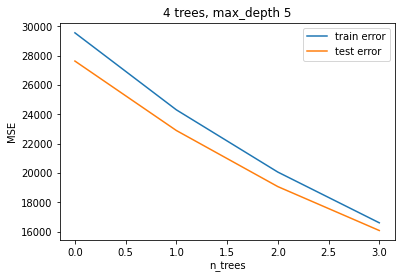

Ошибка алгоритма из 5 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 11468.0, на тестовой выборке: 11537.7


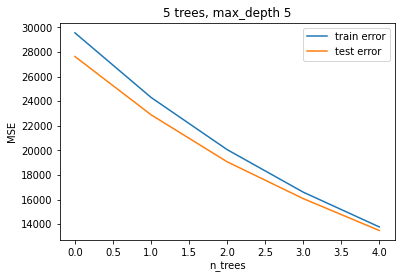

Ошибка алгоритма из 10 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 4921.8, на тестовой выборке: 6187.1


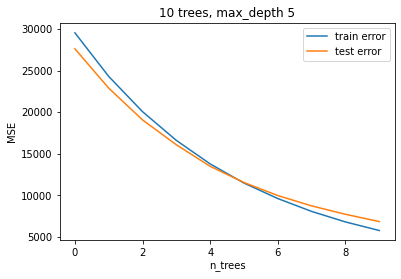

Ошибка алгоритма из 15 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 2402.2, на тестовой выборке: 4180.5


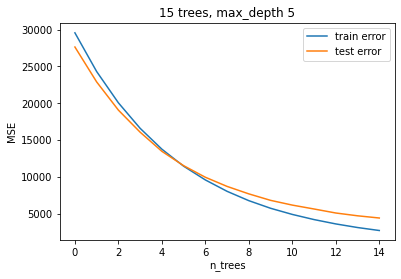

Ошибка алгоритма из 20 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 1361.9, на тестовой выборке: 3653.4


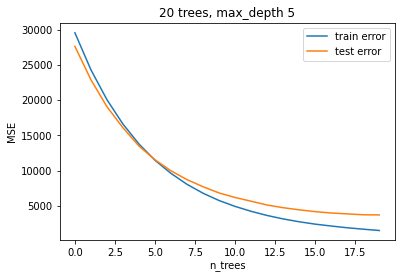

Ошибка алгоритма из 30 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 665.5, на тестовой выборке: 3489.9


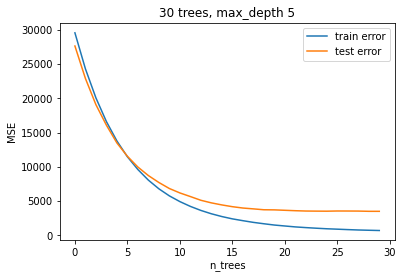

Ошибка алгоритма из 40 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 399.6, на тестовой выборке: 3448.9


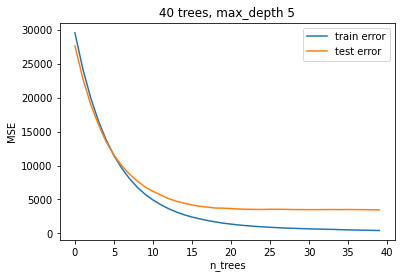

Ошибка алгоритма из 50 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 284.8, на тестовой выборке: 3412.7


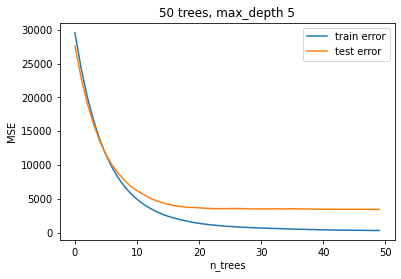

In [12]:
for n_trees in n_trees_range:
    
    coefs = [1] * n_trees
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
    get_error_plot(n_trees, max_depth, train_errors, test_errors)

С увеличением количества решающих деревьях качество предсказания растет, но уже при 30 деревьях качество на тестовой выборке является вполне удовлетворительным, увеличение числа деревьев приводит к значительному снижению MSE на тренировочной выборке, но на тестовой выборке результат отличается не сильно.

In [13]:
n_trees = 30
coefs = [1] * n_trees

max_depth_range = [x for x in range(1, 5)] + [x * 5 for x in range(1, 7)]
max_depth_range

[1, 2, 3, 4, 5, 10, 15, 20, 25, 30]

Ошибка алгоритма из 30 деревьев глубиной 1 с шагом 0.1 на тренировочной выборке: 3061.0, на тестовой выборке: 3232.2


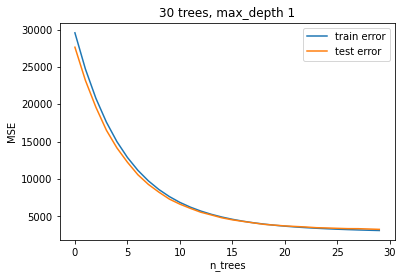

Ошибка алгоритма из 30 деревьев глубиной 2 с шагом 0.1 на тренировочной выборке: 2398.3, на тестовой выборке: 3013.8


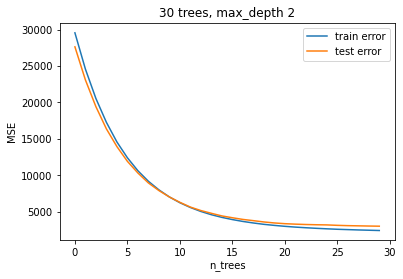

Ошибка алгоритма из 30 деревьев глубиной 3 с шагом 0.1 на тренировочной выборке: 1847.2, на тестовой выборке: 3137.4


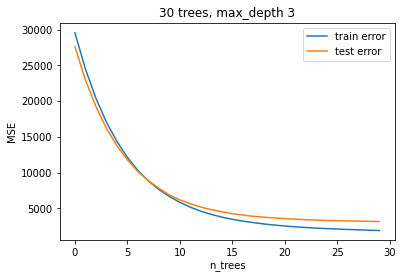

Ошибка алгоритма из 30 деревьев глубиной 4 с шагом 0.1 на тренировочной выборке: 1193.5, на тестовой выборке: 3266.7


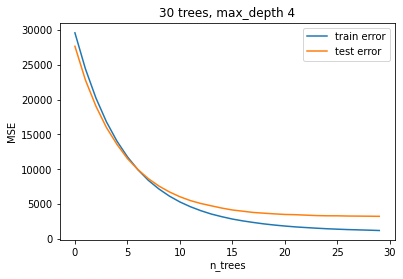

Ошибка алгоритма из 30 деревьев глубиной 5 с шагом 0.1 на тренировочной выборке: 665.5, на тестовой выборке: 3489.9


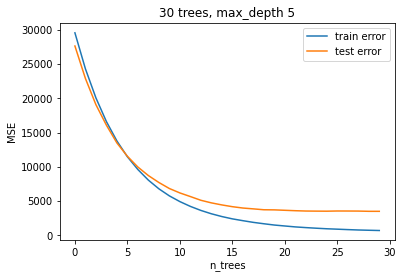

Ошибка алгоритма из 30 деревьев глубиной 10 с шагом 0.1 на тренировочной выборке: 56.1, на тестовой выборке: 4838.8


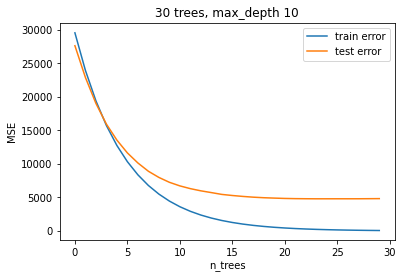

Ошибка алгоритма из 30 деревьев глубиной 15 с шагом 0.1 на тренировочной выборке: 53.1, на тестовой выборке: 6361.4


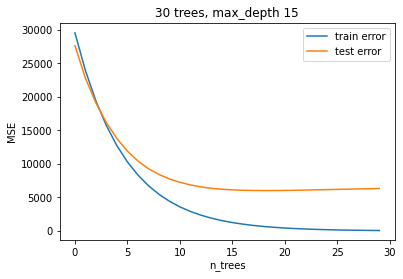

Ошибка алгоритма из 30 деревьев глубиной 20 с шагом 0.1 на тренировочной выборке: 53.1, на тестовой выборке: 6361.4


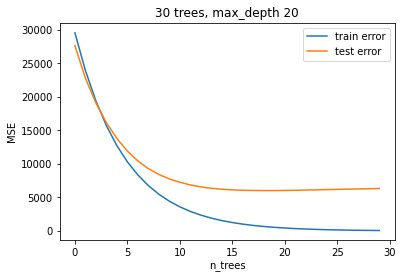

Ошибка алгоритма из 30 деревьев глубиной 25 с шагом 0.1 на тренировочной выборке: 53.1, на тестовой выборке: 6361.4


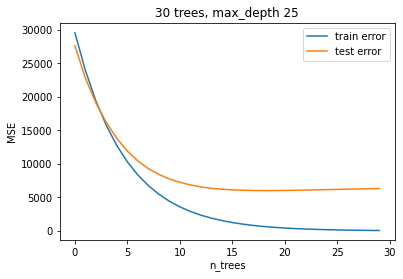

Ошибка алгоритма из 30 деревьев глубиной 30 с шагом 0.1 на тренировочной выборке: 53.1, на тестовой выборке: 6361.4


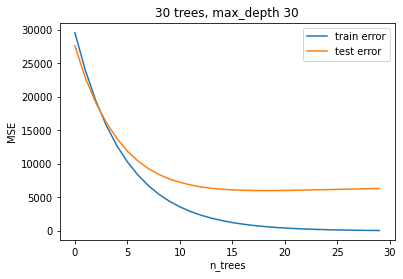

In [14]:
for max_depth in max_depth_range:
    
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
    get_error_plot(n_trees, max_depth, train_errors, test_errors)

Наибольшую эффективность алгоритм показывает при глубине деревьев в 2 узла, при более глубоких деревьях алгоритм начинает переобучаться: MSE на тренировочной выборке падает, на тестовой растет.

In [15]:
n_trees = 30
max_depth = 2
coefs = [1] * n_trees

eta_range = [10 ** -x for x in range(4)]
eta_range

[1, 0.1, 0.01, 0.001]

Ошибка алгоритма из 30 деревьев глубиной 2 с шагом 1 на тренировочной выборке: 993.2, на тестовой выборке: 6121.7


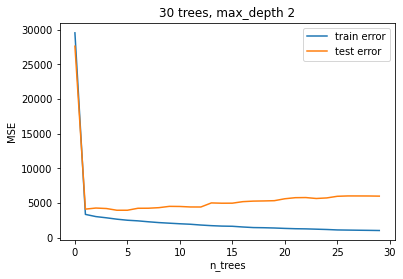

Ошибка алгоритма из 30 деревьев глубиной 2 с шагом 0.1 на тренировочной выборке: 2398.3, на тестовой выборке: 3013.8


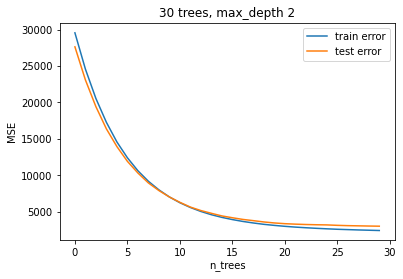

Ошибка алгоритма из 30 деревьев глубиной 2 с шагом 0.01 на тренировочной выборке: 17674.5, на тестовой выборке: 16776.3


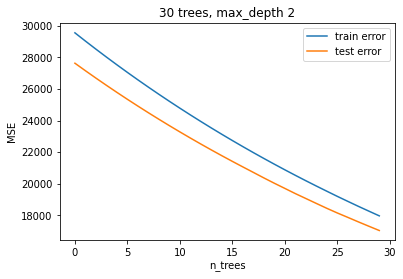

Ошибка алгоритма из 30 деревьев глубиной 2 с шагом 0.001 на тренировочной выборке: 28031.0, на тестовой выборке: 26240.9


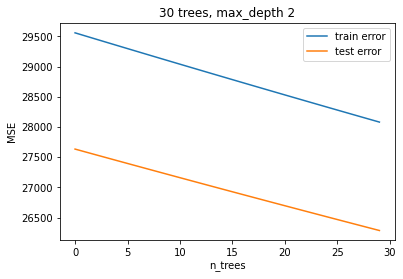

In [16]:
for eta in eta_range:
    
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
    get_error_plot(n_trees, max_depth, train_errors, test_errors)

Оптимальное значение $eta=0.1,$ при меньших значениях алгоритм не успевает сойтись, при бо'льших - не достигает приемлемой точности.

**Задание 2: (опция).** Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [17]:
def stochastic_gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta, n):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        b = np.random.randint(X_train.shape[0], size=n)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train[b], y_train[b])
            
            train_errors.append(mean_squared_error(y_train[b], gb_predict(X_train[b], trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train[b], trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train[b], bias(y_train[b], target))
            
            train_errors.append(mean_squared_error(y_train[b], gb_predict(X_train[b], trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [18]:
n = int(0.5 * X_train.shape[0])

In [19]:
n_trees = 30
max_depth = 2
eta = 0.1
coefs = [1] * n_trees

In [20]:
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
st_trees, st_train_errors, st_test_errors = stochastic_gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta, n)

evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

print('\nCтохастический градиентный бустинг:')
evaluate_alg(X_train, X_test, y_train, y_test, st_trees, coefs, eta)

Ошибка алгоритма из 30 деревьев глубиной 2 с шагом 0.1 на тренировочной выборке: 2398.3, на тестовой выборке: 3013.8

Cтохастический градиентный бустинг:
Ошибка алгоритма из 30 деревьев глубиной 2 с шагом 0.1 на тренировочной выборке: 2453.2, на тестовой выборке: 3078.8


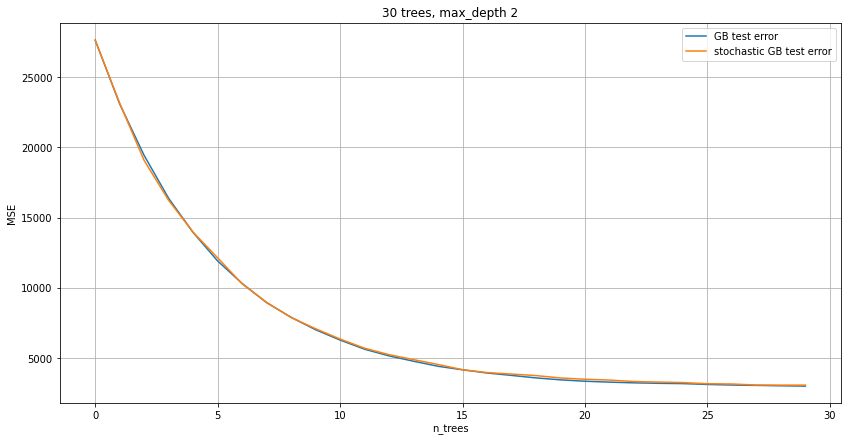

In [40]:
fig = plt.figure(figsize=(14, 7))

plt.xlabel('n_trees')
plt.ylabel('MSE')
plt.plot(list(range(n_trees)), test_errors, label='GB test error')
plt.plot(list(range(n_trees)), st_test_errors, label='stochastic GB test error')
plt.legend(loc='upper right')
plt.title(f'{n_trees} trees, max_depth {max_depth}')
plt.grid()

Результаты обоих алгоритмов являются примерно одинаковыми.

**Задание 3: (опция).** Реализовать алгоритм градиетного бустинга, основанный на реализации решающего дерева из ДЗ4 / методички к уроку 4. Сделать выводы о качестве алгоритма по сравнению с реализацией из п.1.

In [41]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [42]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        return prediction        

In [43]:
# Расчет критерия Джини

def gini(labels):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity

In [44]:
# Расчет качества

def quality(left_labels, right_labels, current_gini):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

In [45]:
# Разбиение датасета в узле

def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [46]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels, min_leaf): #  обозначим минимальное количество объектов в узле

    current_gini = gini(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            
            #  пропускаем разбиения, в которых в узле остается менее min_leaf объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [47]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels, max_depth, min_samples=2, min_leaf=5):

    quality, t, index = find_best_split(data, labels, min_leaf)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)
    
    # глубина дерева
    if max_depth == 0:
        return Leaf(data, labels)
    
    # минимальное количество признаков
    if len(data) <= min_samples:
        return Leaf(data, labels)
        
  
    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
    
    max_depth -= 1

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels, max_depth)
    false_branch = build_tree(false_data, false_labels, max_depth)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [48]:
def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [49]:
def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

In [50]:
# Введем функцию подсчета точности как доли правильных ответов
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [51]:
def gb_fit_tree(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree = build_tree(X_train, y_train, max_depth=max_depth)
            trees.append(tree)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict_tree(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree = build_tree(X_train, bias(y_train, target), max_depth=max_depth)
            trees.append(tree)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

    return trees, train_errors, test_errors

In [52]:
def gb_predict_tree(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    pass
#     return np.array([sum([eta * coef * 
#     (???) alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [53]:
# trees, train_errors, test_errors = gb_fit_tree(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
# evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
# get_error_plot(n_trees, max_depth, train_errors, test_errors)